## IMPORTING LIBRARIES

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
import keras
import tensorflow
from keras.layers import *
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional,Conv1D, MaxPooling1D, Flatten,GRU, Dense
from tensorflow.keras.utils import to_categorical
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [95]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [182]:
df=pd.read_csv("dataset\Crop_recommendation.csv")

In [183]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [184]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [185]:
df.shape

(2200, 8)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [187]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [188]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## IMPUTATION

In [189]:
numerical_data=df.select_dtypes(include=[np.number])
categorical_data=df.select_dtypes(exclude=[np.number])

In [190]:
print(categorical_data.shape)

(2200, 1)


In [191]:
for x in categorical_data:
    df[x] = df[x].fillna(df[x].mode()[0])

In [192]:
for x in numerical_data:
    df[x] = df[x].fillna(df[x].median())

## LABEL ENCODING

In [193]:
enc = OrdinalEncoder()
enc_data = enc.fit_transform(categorical_data)

In [194]:
data_enc  = pd.DataFrame(enc_data, columns=categorical_data.columns)

In [195]:
data_out = pd.concat([data_enc,numerical_data], axis=1) 

## SPLITING DATASET

In [196]:
x=data_out.iloc[:,1:]
y=data_out.iloc[:,0]

In [197]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## MODEL TRAINING

## DECISION TREE

In [112]:
clf_dt =DecisionTreeClassifier()
clf_dt.fit(x_train,y_train)
y_pred=clf_dt.predict(x_test)

In [113]:
from sklearn.metrics import classification_report,accuracy_score
tree_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(tree_acc)

0.9848484848484849


[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 32  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

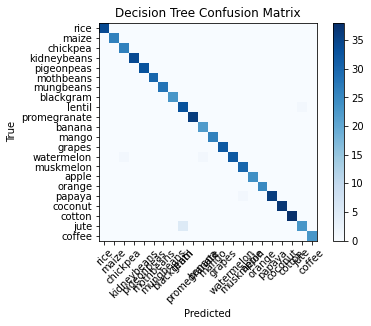

In [121]:
#clf = DecisionTreeClassifier(random_state=42)
clf_dt.fit(x_train, y_train)
y_pred = clf_dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Assuming num_classes is defined
num_classes = 22

# Plot confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"], rotation=45)
plt.yticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [115]:
# from sklearn.metrics import roc_auc_score

# # Get the predicted probability estimates for all classes
# y_pred_proba = clf.predict_proba(x_test)

# # Compute the ROC AUC score for all classes
# roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# # Print the ROC AUC score
# print('ROC AUC score:', roc_auc)


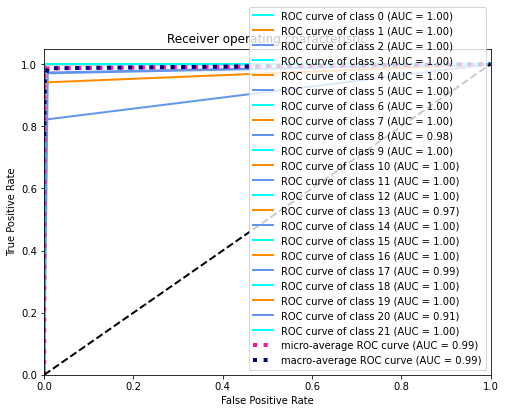

In [122]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the predicted probability estimates for all classes
y_pred_proba = clf_dt.predict_proba(x_test)

# Compute the ROC curves and AUCs for all classes
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and AUC
fpr["macro"] = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
tpr_ = np.zeros_like(fpr["macro"])
for i in range(n_classes):
    tpr_ += np.interp(fpr["macro"], fpr[i], tpr[i])
tpr_ /= n_classes
tpr["macro"] = tpr_
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [27]:
# auc_score = auc(fpr, tpr)
# plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
# plt.plot([0, 1], [0, 1], linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Decision Tree')
# plt.legend()
# plt.show()

## XGBOOST

In [117]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train,y_train)
y_pred=xgb_classifier.predict(x_test)

In [118]:
from sklearn.metrics import classification_report,accuracy_score
xgb_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(xgb_acc)

0.9803030303030303


[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

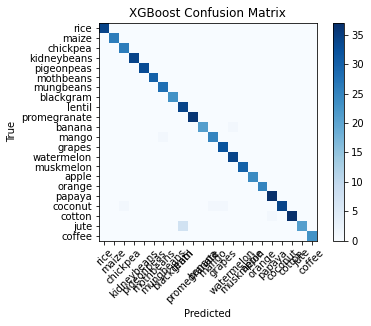

In [123]:
#No ERROR
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"], rotation=45)
plt.yticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Confusion Matrix')
plt.show()

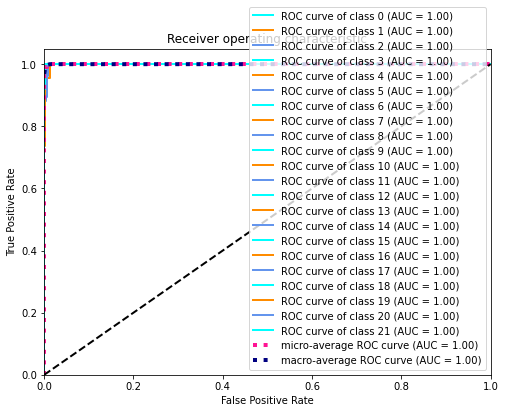

In [124]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the predicted probability estimates for all classes
y_pred_proba = xgb_classifier.predict_proba(x_test)

# Compute the ROC curves and AUCs for all classes
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and AUC
fpr["macro"] = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
tpr_ = np.zeros_like(fpr["macro"])
for i in range(n_classes):
    tpr_ += np.interp(fpr["macro"], fpr[i], tpr[i])
tpr_ /= n_classes
tpr["macro"] = tpr_
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## ANN

In [199]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

In [200]:
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [201]:
from tensorflow.keras.layers import Dense

In [202]:
model = keras.Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [203]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [204]:
model.fit(x_train, y_train, batch_size=100, epochs=20,validation_data=(x_test, y_test))

Epoch 1/20
16/16 [==============================] - 1s 12ms/step - loss: -320.0155 - accuracy: 0.0481 - val_loss: -539.5216 - val_accuracy: 0.0394
Epoch 2/20
16/16 [==============================] - 0s 5ms/step - loss: -712.4774 - accuracy: 0.0481 - val_loss: -983.8810 - val_accuracy: 0.0394
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: -1222.7194 - accuracy: 0.0481 - val_loss: -1622.7531 - val_accuracy: 0.0394
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: -1957.4132 - accuracy: 0.0481 - val_loss: -2528.9329 - val_accuracy: 0.0394
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: -2998.2939 - accuracy: 0.0481 - val_loss: -3794.7122 - val_accuracy: 0.0394
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: -4428.9858 - accuracy: 0.0481 - val_loss: -5548.4688 - val_accuracy: 0.0394
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: -6412.5645 - accuracy: 0.0481 - val_loss: -

In [205]:
abc=model.predict(x_test)
acc =accuracy_score(abc,y_test)
print(acc)

21/21 [==============================] - 0s 1ms/step
0.03939393939393939


21/21 [==============================] - 0s 1ms/step
[[ 0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

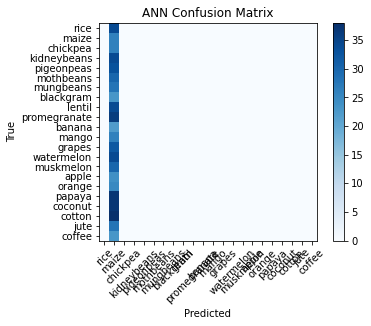

In [207]:
# for Confusion matrix
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"], rotation=45)
plt.yticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ANN Confusion Matrix')
plt.show()

## RANDOM FOREST

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [128]:
from sklearn.metrics import classification_report, accuracy_score
acc_rf = accuracy_score(y_true=y_test, y_pred=y_pred)
print(acc_rf)

0.9924242424242424


[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 33  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

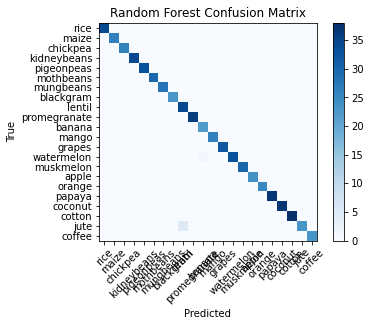

In [129]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"], rotation=45)
plt.yticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

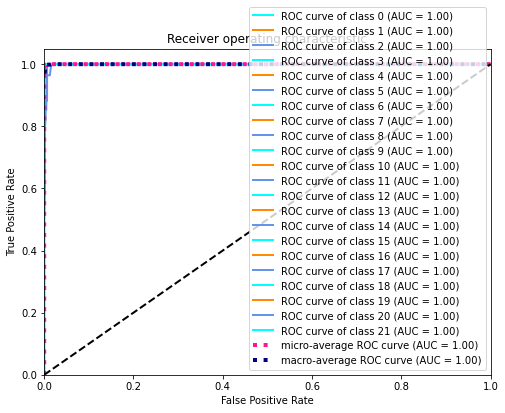

In [130]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the predicted probability estimates for all classes
y_pred_proba = clf.predict_proba(x_test)

# Compute the ROC curves and AUCs for all classes
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and AUC
fpr["macro"] = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
tpr_ = np.zeros_like(fpr["macro"])
for i in range(n_classes):
    tpr_ += np.interp(fpr["macro"], fpr[i], tpr[i])
tpr_ /= n_classes
tpr["macro"] = tpr_
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## NAIVE BAYES

In [131]:
from sklearn.naive_bayes import GaussianNB

In [132]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

In [133]:
from sklearn.metrics import classification_report,accuracy_score
bayes_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(bayes_acc)

0.9939393939393939


[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

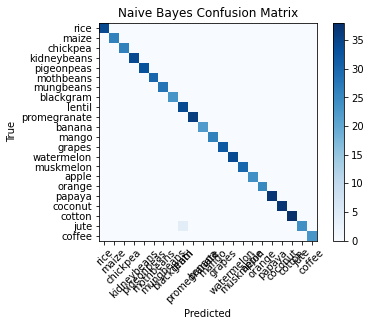

In [134]:
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
num_classes = 22

# Plot confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"], rotation=45)
plt.yticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

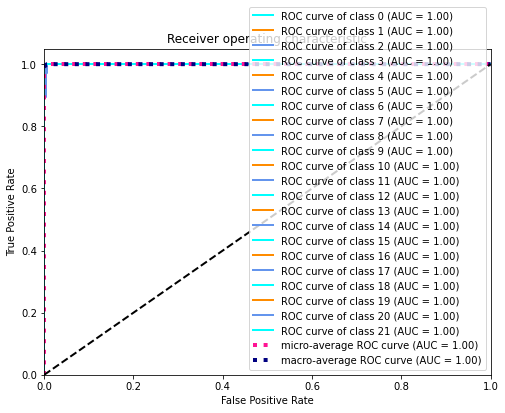

In [135]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the predicted probability estimates for all classes
y_pred_proba = gnb.predict_proba(x_test)

# Compute the ROC curves and AUCs for all classes
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and AUC
fpr["macro"] = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
tpr_ = np.zeros_like(fpr["macro"])
for i in range(n_classes):
    tpr_ += np.interp(fpr["macro"], fpr[i], tpr[i])
tpr_ /= n_classes
tpr["macro"] = tpr_
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## LOGISTIC REGRESSION

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
lr=LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc_lr=accuracy_score(y_pred,y_test)
acc_lr

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.946969696969697

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  2  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 30  0  0  0  0  0  0  0  0  2  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 20  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  4  0  1  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0 28  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

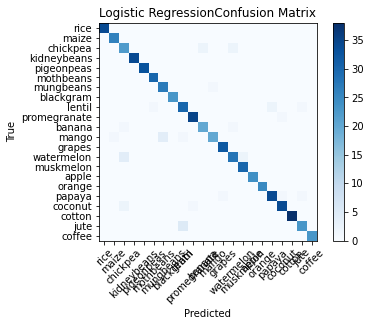

In [137]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"], rotation=45)
plt.yticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic RegressionConfusion Matrix')
plt.show()

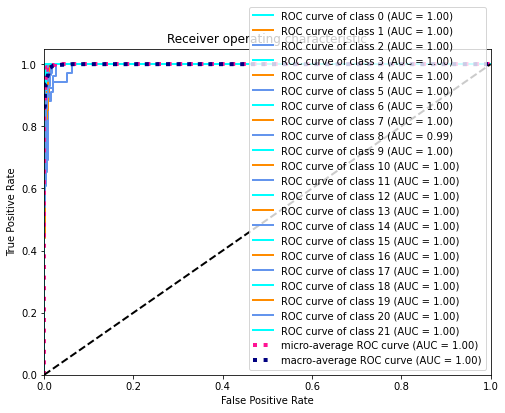

In [138]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the predicted probability estimates for all classes
y_pred_proba = lr.predict_proba(x_test)

# Compute the ROC curves and AUCs for all classes
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and AUC
fpr["macro"] = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
tpr_ = np.zeros_like(fpr["macro"])
for i in range(n_classes):
    tpr_ += np.interp(fpr["macro"], fpr[i], tpr[i])
tpr_ /= n_classes
tpr["macro"] = tpr_
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## SVM

In [139]:
from sklearn.svm import SVC

# instantiate the SVM classifier
# svm = SVC(kernel='linear')
svm = SVC(kernel='linear', probability=True)


# fit the SVM classifier to the training data
svm.fit(x_train, y_train)

# make predictions on the test data
y_pred = svm.predict(x_test)


In [140]:
# calculate the accuracy of the SVM classifier
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy
print('Accuracy:', accuracy)


Accuracy: 0.9787878787878788


[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

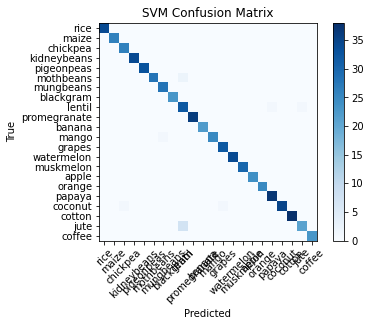

In [141]:
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"], rotation=45)
plt.yticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()

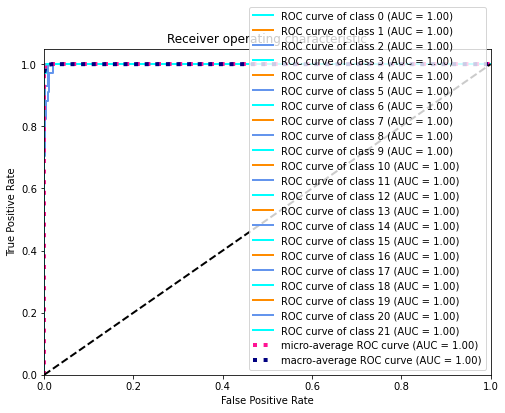

In [142]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the predicted probability estimates for all classes
y_pred_proba = svm.predict_proba(x_test)

# Compute the ROC curves and AUCs for all classes
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and AUC
fpr["macro"] = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
tpr_ = np.zeros_like(fpr["macro"])
for i in range(n_classes):
    tpr_ += np.interp(fpr["macro"], fpr[i], tpr[i])
tpr_ /= n_classes
tpr["macro"] = tpr_
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## KNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# fit the KNN classifier to the training data
knn.fit(x_train, y_train)

# make predictions on the test data
y_pred = knn.predict(x_test)


In [144]:
# calculate the accuracy of the KNN classifier
accuracy_KNN = accuracy_score(y_test, y_pred)

# print the accuracy
print('Accuracy:', accuracy_KNN)


Accuracy: 0.9772727272727273


[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 32  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

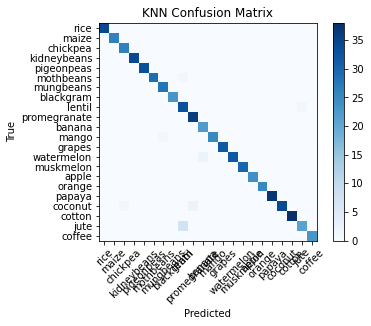

In [145]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"], rotation=45)
plt.yticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.show()

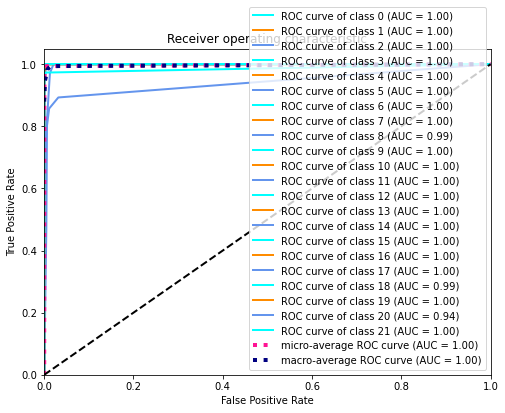

In [146]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the predicted probability estimates for all classes
y_pred_proba = knn.predict_proba(x_test)

# Compute the ROC curves and AUCs for all classes
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and AUC
fpr["macro"] = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
tpr_ = np.zeros_like(fpr["macro"])
for i in range(n_classes):
    tpr_ += np.interp(fpr["macro"], fpr[i], tpr[i])
tpr_ /= n_classes
tpr["macro"] = tpr_
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## LSTM

In [147]:
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [148]:
timesteps = 1
input_dim = X_train.shape[1]
X_train = X_train.reshape((X_train.shape[0], timesteps, input_dim))
X_val = X_val.reshape((X_val.shape[0], timesteps, input_dim))
X_test = X_test.reshape((X_test.shape[0], timesteps, input_dim))

In [149]:
# Define the number of classes in your classification problem
num_classes = 22

In [150]:
 # Convert labels to integers
 y_train = np.array([0 if label=='rice' else 1 if label=='maize' else 2 if label=='chickpea' else 3 if label=='kidneybeans' else 4 if label=='pigeonpeas' else 5 if label=='mouthbeans' else 6 if label=='mungbeans' else 7 if label=='blackgram' else 8 if label=='lentil' else 9 if label=='promegranate' else 10 if label=='banana' else 11 if label=='mango' else 12 if label=='grapes' else 13 if label=='watermelon' else 14 if label=='muskmelon' else 15 if label=='apple' else 16 if label=='orange' else 17 if label=='papaya' else 18 if label=='coconut' else 19 if label=='cotton' else 20 if label=='jute' else 21 for label in y_train])
 y_val = np.array([0 if label=='rice' else 1 if label=='maize' else 2 if label=='chickpea' else 3 if label=='kidneybeans' else 4 if label=='pigeonpeas' else 5 if label=='mouthbeans' else 6 if label=='mungbeans' else 7 if label=='blackgram' else 8 if label=='lentil' else 9 if label=='promegranate' else 10 if label=='banana' else 11 if label=='mango' else 12 if label=='grapes' else 13 if label=='watermelon' else 14 if label=='muskmelon' else 15 if label=='apple' else 16 if label=='orange' else 17 if label=='papaya' else 18 if label=='coconut' else 19 if label=='cotton' else 20 if label=='jute' else 21 for label in y_val])
 y_test = np.array([0 if label=='rice' else 1 if label=='maize' else 2 if label=='chickpea' else 3 if label=='kidneybeans' else 4 if label=='pigeonpeas' else 5 if label=='mouthbeans' else 6 if label=='mungbeans' else 7 if label=='blackgram' else 8 if label=='lentil' else 9 if label=='promegranate' else 10 if label=='banana' else 11 if label=='mango' else 12 if label=='grapes' else 13 if label=='watermelon' else 14 if label=='muskmelon' else 15 if label=='apple' else 16 if label=='orange' else 17 if label=='papaya' else 18 if label=='coconut' else 19 if label=='cotton' else 20 if label=='jute' else 21 for label in y_test])



In [151]:
 # Convert lAbels to one-hot encoded vectors
 y_train = to_categorical(y_train, num_classes)
 y_val = to_categorical(y_val, num_classes)
 y_test = to_categorical(y_test, num_classes)

In [152]:
# Define the model architecture
model = Sequential()
model.add(LSTM(32, input_shape=(timesteps, input_dim)))
model.add(Dense(num_classes, activation='softmax'))

In [153]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [154]:
 # Train the model
 model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
44/44 [==============================] - 2s 12ms/step - loss: 2.8851 - accuracy: 0.1122 - val_loss: 2.6027 - val_accuracy: 0.3097
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 2.4278 - accuracy: 0.3636 - val_loss: 2.2168 - val_accuracy: 0.5142
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 2.0948 - accuracy: 0.5185 - val_loss: 1.9433 - val_accuracy: 0.5739
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 1.8274 - accuracy: 0.6101 - val_loss: 1.7150 - val_accuracy: 0.6477
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 1.6108 - accuracy: 0.6690 - val_loss: 1.5299 - val_accuracy: 0.6761
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 1.4349 - accuracy: 0.7145 - val_loss: 1.3703 - val_accuracy: 0.7216
Epoch 7/100
44/44 [==============================] - 0s 4ms/step - loss: 1.2818 - accuracy: 0.7685 - val_loss: 1.2260 - val_accuracy: 0.7557
Epoch 8/100


Epoch 59/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1326 - accuracy: 0.9702 - val_loss: 0.1644 - val_accuracy: 0.9659
Epoch 60/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1287 - accuracy: 0.9759 - val_loss: 0.1566 - val_accuracy: 0.9631
Epoch 61/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1365 - accuracy: 0.9666 - val_loss: 0.1624 - val_accuracy: 0.9602
Epoch 62/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1288 - accuracy: 0.9737 - val_loss: 0.1571 - val_accuracy: 0.9574
Epoch 63/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.9723 - val_loss: 0.1672 - val_accuracy: 0.9602
Epoch 64/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1239 - accuracy: 0.9780 - val_loss: 0.1492 - val_accuracy: 0.9659
Epoch 65/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1270 - accuracy: 0.9702 - val_loss: 0.1557 - val_accuracy: 0.9602
Epoch 

In [155]:
# Test the model on the test data
loss, accuracy_LSTM = model.evaluate(X_test, y_test, batch_size=32)

print('Test loss:', loss)
print('Test accuracy:', accuracy_LSTM)

14/14 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.9568
Test loss: 0.14623452723026276
Test accuracy: 0.956818163394928


14/14 [==============================] - 0s 3ms/step
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  1]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

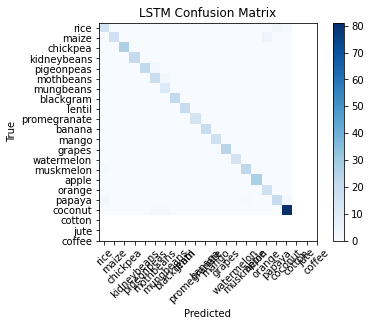

In [156]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Get the predicted labels for the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # Convert one-hot encoded vectors to labels

# Convert one-hot encoded true labels to labels
y_true = np.argmax(y_test, axis=1)

# Create confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
print(confusion_mat)
# Plot confusion matrix
plt.imshow(confusion_mat, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"], rotation=45)
plt.yticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LSTM Confusion Matrix')
plt.show()


14/14 [==============================] - 0s 2ms/step


C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


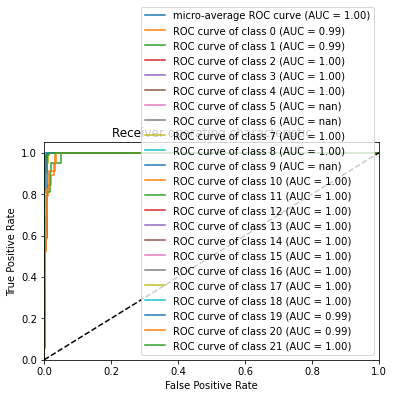

In [157]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probability estimates for all classes
y_pred_proba = model.predict(X_test)

# Convert true labels to binary (0 or 1) for each class
y_true = np.zeros_like(y_test)
for i in range(y_test.shape[1]):
    y_true[:, i] = (y_test[:, i] == 1).astype(int)

# Compute the ROC curves and AUCs for all classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_pred_proba.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-averaged ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the micro-averaged ROC curve
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (AUC = {0:0.2f})'
        ''.format(roc_auc["micro"]))

# Add the ROC curves for all classes to the plot
for i in range(y_pred_proba.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
            ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## BILSTM

In [158]:
# Define the model architecture
model_BILSTM = Sequential()
model_BILSTM.add(Bidirectional(LSTM(32), input_shape=(timesteps, input_dim)))
model_BILSTM.add(Dense(num_classes, activation='softmax'))

In [159]:
# Compile the model
model_BILSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [160]:
# Train the model
model_BILSTM.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
44/44 [==============================] - 3s 19ms/step - loss: 2.8067 - accuracy: 0.1804 - val_loss: 2.3814 - val_accuracy: 0.4460
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 2.0825 - accuracy: 0.5078 - val_loss: 1.8679 - val_accuracy: 0.5938
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 1.6323 - accuracy: 0.6626 - val_loss: 1.5011 - val_accuracy: 0.7188
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 1.3269 - accuracy: 0.7777 - val_loss: 1.2588 - val_accuracy: 0.7585
Epoch 5/100
44/44 [==============================] - 0s 4ms/step - loss: 1.1169 - accuracy: 0.8047 - val_loss: 1.0834 - val_accuracy: 0.7926
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 0.9586 - accuracy: 0.8366 - val_loss: 0.9435 - val_accuracy: 0.8153
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 0.8343 - accuracy: 0.8636 - val_loss: 0.8398 - val_accuracy: 0.8210
Epoch 8/100


Epoch 59/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0849 - accuracy: 0.9766 - val_loss: 0.1245 - val_accuracy: 0.9631
Epoch 60/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0849 - accuracy: 0.9751 - val_loss: 0.1248 - val_accuracy: 0.9574
Epoch 61/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0796 - accuracy: 0.9815 - val_loss: 0.1300 - val_accuracy: 0.9574
Epoch 62/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0804 - accuracy: 0.9794 - val_loss: 0.1494 - val_accuracy: 0.9432
Epoch 63/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0761 - accuracy: 0.9830 - val_loss: 0.1303 - val_accuracy: 0.9574
Epoch 64/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0785 - accuracy: 0.9780 - val_loss: 0.1382 - val_accuracy: 0.9631
Epoch 65/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0835 - accuracy: 0.9787 - val_loss: 0.1276 - val_accuracy: 0.9602
Epoch 

In [161]:
# Evaluate the model
loss, accuracy_BILSTM = model_BILSTM.evaluate(X_test, y_test, batch_size=32)
print(f'Test loss: {loss:.3f}, test accuracy: {accuracy_BILSTM:.3f}')

14/14 [==============================] - 1s 2ms/step - loss: 0.1384 - accuracy: 0.9591
Test loss: 0.138, test accuracy: 0.959


14/14 [==============================] - 1s 2ms/step
[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  1  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0 14  2  0  0  0  0  0  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

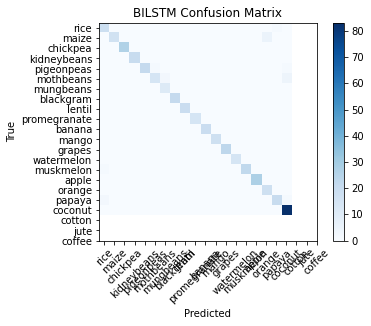

In [162]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Get the predicted labels for the test data
y_pred = model_BILSTM.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # Convert one-hot encoded vectors to labels

# Convert one-hot encoded true labels to labels
y_true = np.argmax(y_test, axis=1)

# Create confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
print(confusion_mat)
# Plot confusion matrix
plt.imshow(confusion_mat, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"], rotation=45)
plt.yticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('BILSTM Confusion Matrix')
plt.show()


14/14 [==============================] - 0s 2ms/step


C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


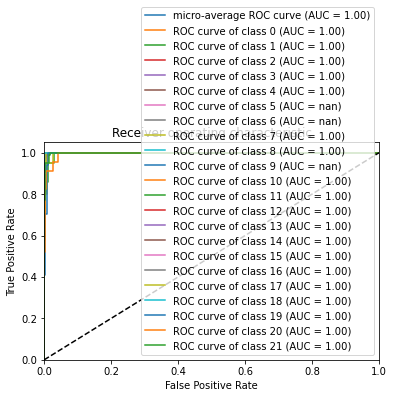

In [163]:
# AUC Curve
from sklearn.metrics import roc_curve, auc

# Get the predicted probability estimates for all classes
y_pred_proba = model_BILSTM.predict(X_test)

# Convert true labels to binary (0 or 1) for each class
y_true = np.zeros_like(y_test)
for i in range(y_test.shape[1]):
    y_true[:, i] = (y_test[:, i] == 1).astype(int)

# Compute the ROC curves and AUCs for all classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_pred_proba.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-averaged ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the micro-averaged ROC curve
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (AUC = {0:0.2f})'
        ''.format(roc_auc["micro"]))

# Add the ROC curves for all classes to the plot
for i in range(y_pred_proba.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
            ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## GRU

In [164]:
# Define the model architecture
model = Sequential()
model.add(GRU(32, input_shape=(timesteps, input_dim)))
model.add(Dense(num_classes, activation='softmax'))

In [165]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [166]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
44/44 [==============================] - 2s 12ms/step - loss: 2.9549 - accuracy: 0.1513 - val_loss: 2.5569 - val_accuracy: 0.3381
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 2.3081 - accuracy: 0.4105 - val_loss: 2.1168 - val_accuracy: 0.4119
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 1.9668 - accuracy: 0.4666 - val_loss: 1.8522 - val_accuracy: 0.4432
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 1.7383 - accuracy: 0.5064 - val_loss: 1.6635 - val_accuracy: 0.5114
Epoch 5/100
44/44 [==============================] - 0s 4ms/step - loss: 1.5578 - accuracy: 0.5746 - val_loss: 1.4896 - val_accuracy: 0.5881
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 1.4056 - accuracy: 0.6413 - val_loss: 1.3550 - val_accuracy: 0.6591
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 1.2813 - accuracy: 0.7067 - val_loss: 1.2424 - val_accuracy: 0.7756
Epoch 8/100


Epoch 59/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1802 - accuracy: 0.9631 - val_loss: 0.2002 - val_accuracy: 0.9517
Epoch 60/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1780 - accuracy: 0.9659 - val_loss: 0.1978 - val_accuracy: 0.9517
Epoch 61/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1750 - accuracy: 0.9652 - val_loss: 0.2019 - val_accuracy: 0.9489
Epoch 62/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.9638 - val_loss: 0.1940 - val_accuracy: 0.9517
Epoch 63/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1716 - accuracy: 0.9588 - val_loss: 0.1906 - val_accuracy: 0.9489
Epoch 64/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1659 - accuracy: 0.9659 - val_loss: 0.1859 - val_accuracy: 0.9489
Epoch 65/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1667 - accuracy: 0.9638 - val_loss: 0.1923 - val_accuracy: 0.9375
Epoch 

In [167]:
# Evaluate the model on test data
loss, accuracy_GRU = model.evaluate(X_test, y_test, batch_size=32)
print(f'Test loss: {loss:.3f}, test accuracy: {accuracy_GRU:.3f}')

14/14 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9477
Test loss: 0.162, test accuracy: 0.948


14/14 [==============================] - 0s 2ms/step
[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

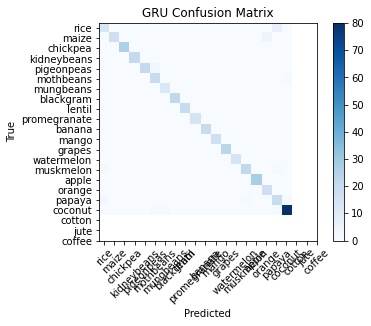

In [168]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Get the predicted labels for the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # Convert one-hot encoded vectors to labels

# Convert one-hot encoded true labels to labels
y_true = np.argmax(y_test, axis=1)

# Create confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
print(confusion_mat)
# Plot confusion matrix
plt.imshow(confusion_mat, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"], rotation=45)
plt.yticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('GRU Confusion Matrix')
plt.show()


14/14 [==============================] - 0s 2ms/step


C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


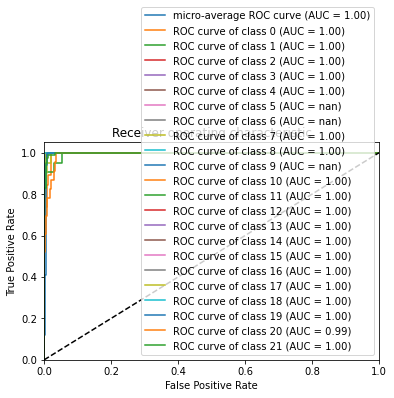

In [169]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probability estimates for all classes
y_pred_proba = model.predict(X_test)

# Convert true labels to binary (0 or 1) for each class
y_true = np.zeros_like(y_test)
for i in range(y_test.shape[1]):
    y_true[:, i] = (y_test[:, i] == 1).astype(int)

# Compute the ROC curves and AUCs for all classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_pred_proba.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-averaged ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the micro-averaged ROC curve
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (AUC = {0:0.2f})'
        ''.format(roc_auc["micro"]))

# Add the ROC curves for all classes to the plot
for i in range(y_pred_proba.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
            ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## CNN

In [170]:
timesteps = 7
input_dim = 1

X_train = X_train.reshape((X_train.shape[0], timesteps, input_dim))
X_val = X_val.reshape((X_val.shape[0], timesteps, input_dim))
X_test = X_test.reshape((X_test.shape[0], timesteps, input_dim))


In [171]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(timesteps, input_dim)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 1, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

In [172]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
44/44 [==============================] - 1s 7ms/step - loss: 7.4437 - accuracy: 0.0384 - val_loss: 3.0263 - val_accuracy: 0.1477
Epoch 2/10
44/44 [==============================] - 0s 3ms/step - loss: 2.3427 - accuracy: 0.2351 - val_loss: 1.9153 - val_accuracy: 0.3153
Epoch 3/10
44/44 [==============================] - 0s 3ms/step - loss: 1.6379 - accuracy: 0.4084 - val_loss: 1.4198 - val_accuracy: 0.4602
Epoch 4/10
44/44 [==============================] - 0s 3ms/step - loss: 1.2763 - accuracy: 0.5469 - val_loss: 1.1452 - val_accuracy: 0.6477
Epoch 5/10
44/44 [==============================] - 0s 4ms/step - loss: 1.0246 - accuracy: 0.6648 - val_loss: 0.8990 - val_accuracy: 0.7585
Epoch 6/10
44/44 [==============================] - 0s 3ms/step - loss: 0.8582 - accuracy: 0.7195 - val_loss: 0.8088 - val_accuracy: 0.7670
Epoch 7/10
44/44 [==============================] - 0s 4ms/step - loss: 0.7690 - accuracy: 0.7635 - val_loss: 0.7115 - val_accuracy: 0.7756
Epoch 8/10
44/44 [==

In [173]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

14/14 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7955
Test accuracy: 0.7954545617103577


14/14 [==============================] - 0s 2ms/step
[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 1 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 10  5  5  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  2 12  4  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  1  8  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 1  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2 15  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0 

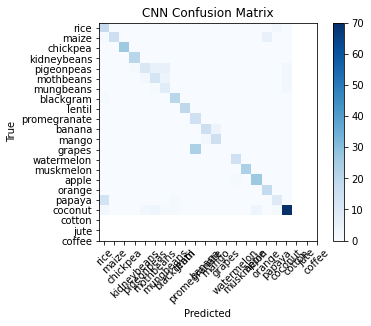

In [174]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Get the predicted labels for the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # Convert one-hot encoded vectors to labels

# Convert one-hot encoded true labels to labels
y_true = np.argmax(y_test, axis=1)

# Create confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
print(confusion_mat)
# Plot confusion matrix
plt.imshow(confusion_mat, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"], rotation=45)
plt.yticks(np.arange(num_classes), ["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbeans", "blackgram", "lentil", "promegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "apple", "orange", "papaya", "coconut", "cotton", "jute", "coffee"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Confusion Matrix')
plt.show()


14/14 [==============================] - 0s 1ms/step


C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


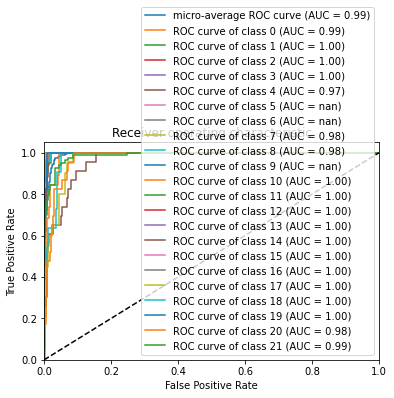

In [175]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probability estimates for all classes
y_pred_proba = model.predict(X_test)

# Convert true labels to binary (0 or 1) for each class
y_true = np.zeros_like(y_test)
for i in range(y_test.shape[1]):
    y_true[:, i] = (y_test[:, i] == 1).astype(int)

# Compute the ROC curves and AUCs for all classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_pred_proba.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-averaged ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the micro-averaged ROC curve
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (AUC = {0:0.2f})'
        ''.format(roc_auc["micro"]))

# Add the ROC curves for all classes to the plot
for i in range(y_pred_proba.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
            ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## PLOTTING GRAPH

In [90]:
import matplotlib.pyplot as plt

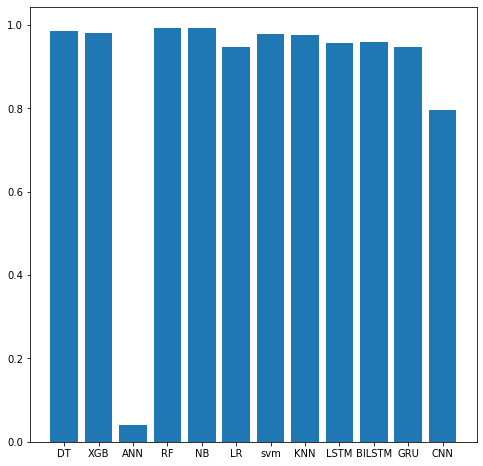

In [180]:
plt.figure(figsize=(8,8))
values = [tree_acc, xgb_acc,acc,acc_rf,bayes_acc,acc_lr,accuracy,accuracy_KNN,accuracy_LSTM,accuracy_BILSTM,accuracy_GRU,test_acc]
labels = ['DT','XGB','ANN','RF','NB','LR','svm','KNN','LSTM','BILSTM','GRU','CNN']
plt.bar(labels, values)
plt.show()